# Steps in Creating a Data Science Project

1. Defining the problem
**Business problem description:**
**Technical problem description:**

2. Getting the data
Setup environment
    Import libraries
    Define constants and control variables    

3. Exploratory data analysis

4. Preparing the data for Machine Learning Algorithms
Data cleaning
Feature engineering
preprocessing

5. Creating and evaluating multiple machine learning models

6. Tuning and selecting final models

7. Presenting findings and/or solutions

8. Launch, monitoring, and maintenance of system

# 1. Defining the problem

    **Business problem description:**
    
    From a promotional point of view, it is beneficial to see which statistics of a fighter affect them winning. These statistics could be things such as KO percentage, number of fights, or engineered statistics such as "work rate": how often a fighter is making submissions, strikes, or take downs.
    
    Many of these statistics seem intuitive to affect a fighter's success, we will ensure we use these features in our exploration, as well as other, less intuitive features.

    **Technical problem description:**
    
    The data is available through an API at: https://sportsdata.io
    
    API documentation for this set: https://sportsdata.io/developers/api-documentation/mma#/sports-data
    
    The data set provides wins, so we will be able to create a supervised linear regression model in order to identify the statistics or set of statistics that correlate strongest with the a fighter's success (wins).

# 2. Getting the data

# Setup environment

    # Import libraries

In [407]:
import pandas as pd
import numpy as np

import os

# library helper
# run: importnb-install from Conda before using
from importnb import Notebook
with Notebook(): 
    import Utility

# custom helper class (from jupyter notebook)
helper = Utility.Helper()

%matplotlib inline
import matplotlib.pyplot as plt

import seaborn as sns

from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score

Class 'Helper' v1.3 has been loaded


        Function to reload changes in Jupyter notebooks

In [408]:
# reload notebooks
from importlib import reload
with Notebook(): __name__ == '__main__' and reload(Utility)

    # Define constants and control variables

In [409]:
DATA_PATH = '../../data/'

FIGSIZE = (20,15)

In [410]:
fighter_file = DATA_PATH + "fighter_stats_UFC_2020.csv"
    
fighter_df = helper.create_df(fighter_file)

# 3. Exploratory data analysis

In [411]:
fighter_df.head()

,FighterId,FirstName,LastName,Nickname,WeightClass,BirthDate,Height,Weight,Reach,Wins,...,TitleWins,TitleLosses,TitleDraws,SigStrikesLandedPerMinute,SigStrikeAccuracy,TakedownAverage,SubmissionAverage,KnockoutPercentage,TechnicalKnockoutPercentage,DecisionPercentage
0,140000992,Chris,Daukaus,NaN,Heavyweight,1989-09-25T00:00:00,75.0,231.0,76.0,12,...,0,0,0,10.9,65.9,0.0,0.0,32.1,32.1,0.0
1,140000735,Brett,Johns,The Pikey,Bantamweight,1992-02-21T00:00:00,67.0,135.0,71.0,17,...,1,0,0,2.0,53.7,3.4,0.7,0.0,0.0,13.2
2,140000485,Raquel,Pennington,Rocky,Women's Bantamweight,1988-09-05T00:00:00,67.0,135.0,67.0,12,...,0,0,0,0.8,27.5,0.3,0.2,0.0,0.0,16.1
3,140000613,Brandon,Moreno,The Assassin Baby,Flyweight,1993-12-07T00:00:00,67.0,125.0,70.0,19,...,1,0,1,1.5,32.4,0.9,0.3,1.7,1.7,5.1
4,140000268,Magomed,Mustafaev,The Sniper,Lightweight,1988-08-02T00:00:00,68.0,156.0,71.0,14,...,0,0,0,7.2,107.4,9.2,1.1,18.6,18.6,0.0


In [412]:
fighter_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 705 entries, 0 to 704
Data columns (total 27 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   FighterId                    705 non-null    int64  
 1   FirstName                    705 non-null    object 
 2   LastName                     705 non-null    object 
 3   Nickname                     541 non-null    object 
 4   WeightClass                  702 non-null    object 
 5   BirthDate                    705 non-null    object 
 6   Height                       705 non-null    float64
 7   Weight                       705 non-null    float64
 8   Reach                        705 non-null    float64
 9   Wins                         705 non-null    int64  
 10  Losses                       705 non-null    int64  
 11  Draws                        705 non-null    int64  
 12  NoContests                   705 non-null    int64  
 13  TechnicalKnockouts  

In [413]:
train_set, test_set = helper.split_train_test(fighter_df, 0.2)

fighters = train_set.drop('Wins', axis=1)
fighters_labels = train_set['Wins'].copy()

In [414]:
non_pred_features = ['FirstName', 'LastName', 'Nickname']

array([[<AxesSubplot:title={'center':'KnockoutPercentage'}>,
        <AxesSubplot:title={'center':'DecisionPercentage'}>,
        <AxesSubplot:title={'center':'SigStrikesLandedPerMinute'}>,
        <AxesSubplot:title={'center':'TakedownAverage'}>],
       [<AxesSubplot:title={'center':'SubmissionAverage'}>,
        <AxesSubplot:title={'center':'Height'}>,
        <AxesSubplot:title={'center':'Reach'}>,
        <AxesSubplot:title={'center':'Weight'}>],
       [<AxesSubplot:title={'center':'Losses'}>,
        <AxesSubplot:title={'center':'Draws'}>,
        <AxesSubplot:title={'center':'NoContests'}>,
        <AxesSubplot:title={'center':'SigStrikeAccuracy'}>],
       [<AxesSubplot:title={'center':'TechnicalKnockoutPercentage'}>,
        <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>]], dtype=object)

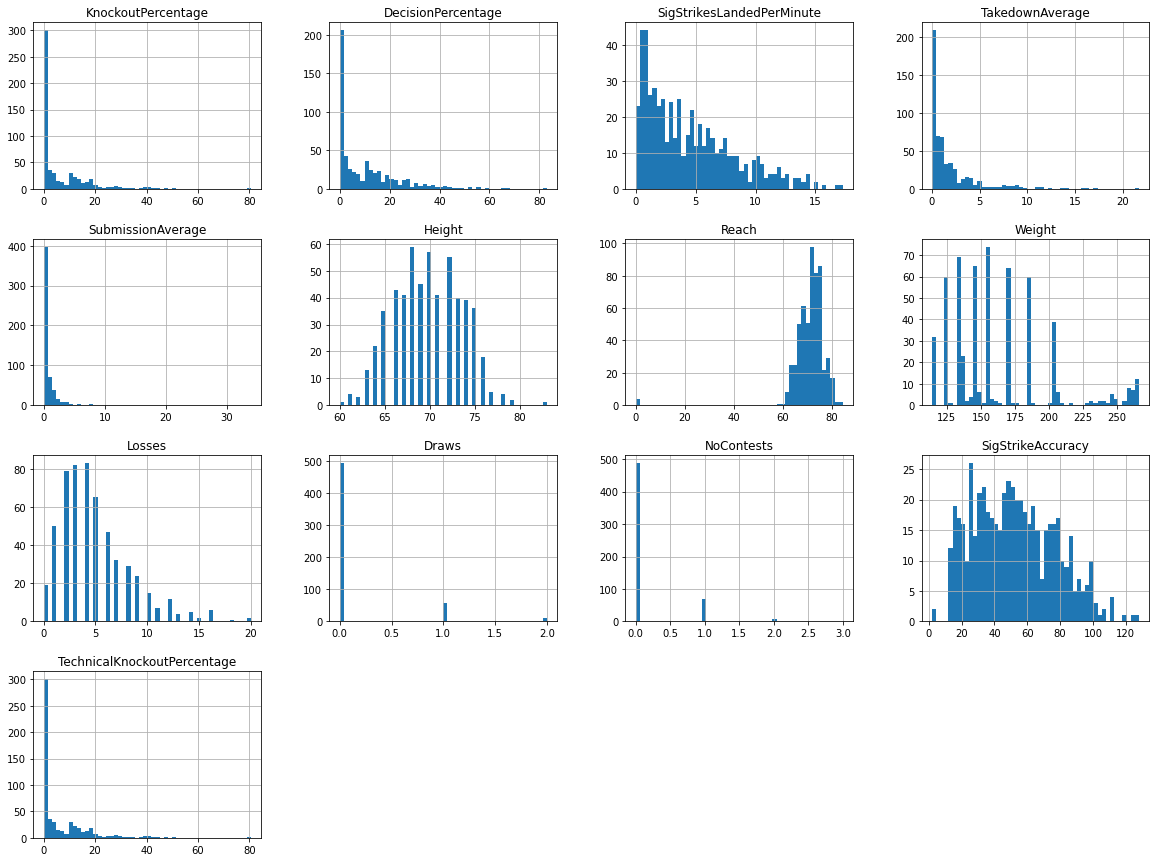

In [415]:
numerical_features = ['KnockoutPercentage', 'DecisionPercentage', 'SigStrikesLandedPerMinute', 'TakedownAverage', 'SubmissionAverage', 'Height', 'Reach', 'Weight', 'Losses', 'Draws', 'NoContests', 'SigStrikeAccuracy', 'TechnicalKnockoutPercentage']

fighters_num = fighters[numerical_features]

fighters_num.hist(bins=50, figsize=FIGSIZE)

In [416]:
# looking at the data it appears KOs () and TKOs () are reported as the same value
fighters.loc[(fighters['KnockoutPercentage'] != fighters['TechnicalKnockoutPercentage'])]

,FighterId,FirstName,LastName,Nickname,WeightClass,BirthDate,Height,Weight,Reach,Losses,...,TitleWins,TitleLosses,TitleDraws,SigStrikesLandedPerMinute,SigStrikeAccuracy,TakedownAverage,SubmissionAverage,KnockoutPercentage,TechnicalKnockoutPercentage,DecisionPercentage


In [417]:
fighters['WeightClass'].value_counts()

Featherweight            80
Lightweight              80
Bantamweight             68
Welterweight             67
Middleweight             59
Light Heavyweight        51
Heavyweight              44
Women's Strawweight      36
Women's Flyweight        32
Flyweight                21
Women's Bantamweight     18
Women's Featherweight     6
Name: WeightClass, dtype: int64

# 4. Preparing the data for Machine Learning Algorithms

# Data cleaning

    Drop non-predictive features (first name, last name, nickname)

In [418]:
fighters = fighters.drop(non_pred_features, axis=1)

In [419]:
# look through the statistical columns for those with NaN/null values
nan_columns = [column for column, value in fighters.iloc[:, 4:].isna().any(axis=0).to_dict().items() if value == True]
print("Columns with NaN values:\n", nan_columns)

# find the amount
nan_row_count = fighters[fighters.iloc[:, 4:].isna().any(axis=1)].shape[0]
print("Count of rows with NaN values: ", nan_count)

Columns with NaN values:
 ['SigStrikesLandedPerMinute', 'SigStrikeAccuracy', 'TakedownAverage', 'SubmissionAverage']
Count of rows with NaN values:  13


    Since there are only 13 rows with NaN values, and these values are not easily imputed we will drop these rows entirely

In [458]:
def drop_na_rows(d, dl):
    '''
    This function expects the following arguments:

        d: DataFrame - relative file path, including file name, of csv file to load to dataframe
        dl: Series - relative file path, including file name, of csv file to load to dataframe

    Returning the dataframe and series with any rows with NaN values removed
    '''
    na_idx = d[d.isna().any(axis=1)].index

    d = d.drop(index=na_idx)
    dl = dl.drop(index=na_idx)
    return d, dl

In [459]:
fighters, fighters_labels = drop_na_rows(fighters, fighters_labels)

# Feature engineering

In [421]:
# integer indices of the following columns: 
#  KnockoutPercentage, DecisionPercentage, SigStrikesLandedPerMinute, TakedownAverage, SubmissionAverage, Height, Reach, Weight, Loss, Draws, NoContests
ko_idx, dec_idx, sig_idx, tkd_idx, sub_idx, hgt_idx, rch_idx, wgt_idx, los_idx, drw_idx, noc_idx = \
0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10

class CombinedAttributesAdder(BaseEstimator, TransformerMixin):
    def __init__(self, add_non_wins=True):
        self.add_non_wins = add_non_wins
    def fit(self, X, y=None):
        return self #nothing else to do
    def transform(self, X):
        # KOs column is always the same as TKOs "combine" them to reduce ambiguity
        StrikeFinishPercentage = X.iloc[:, ko_idx]
        # this stat is left out of the data but can be calculated (win % where not by KOs/TKOs, decisions)
        SubmissionPercentage = 100 - (X.iloc[:, ko_idx] + X.iloc[:, dec_idx])
        WorkAverage = X.iloc[:, sig_idx] * X.iloc[:, tkd_idx] * X.iloc[:, sub_idx]
        Length = X.iloc[:, hgt_idx] * X.iloc[:, rch_idx] / X.iloc[:, wgt_idx]
        if self.add_non_wins:
            NonWins = X.iloc[:, los_idx] + X.iloc[:, drw_idx] + X.iloc[:, noc_idx]
            return np.c_[X, StrikeFinishPercentage, SubmissionPercentage, WorkAverage, Length, NonWins]
        else:
            return np.c_[X, StrikeFinishPercentage, SubmissionPercentage, WorkAverage, Length]

    Let's create a pipeline for the data transformation steps

In [422]:
num_pipeline = Pipeline([
    ('attribs_adder', CombinedAttributesAdder()),
    ('min_max_scaler', MinMaxScaler())
])

In [423]:
from sklearn.compose import ColumnTransformer

num_attribs = list(fighters_num)
cat_attribs = ['WeightClass']

full_pipeline = ColumnTransformer([
    ('num', num_pipeline, num_attribs),
    ('cat', OrdinalEncoder(), cat_attribs)
])

In [424]:
fighters_prepared = full_pipeline.fit_transform(fighters)

In [425]:
lin_reg = LinearRegression()
lin_reg.fit(fighters_prepared, fighters_labels)

LinearRegression()

    Now that we have a working Linear Regression model, we can make a few predictions from the training set:

In [426]:
subset_data = fighters.iloc[:5]
subset_labels = fighters_labels.iloc[:5]
subset_prepared = full_pipeline.transform(subset_data)

print("Predictions:", lin_reg.predict(subset_prepared))
print("Labels(Actual):", list(subset_labels))

Predictions: [13.53015354 11.02770699  8.85822987  9.84370113 13.71519706]
Labels(Actual): [16, 8, 11, 9, 14]


In [427]:
fighters_predictions = lin_reg.predict(fighters_prepared)
lin_mse = mean_squared_error(fighters_labels, fighters_predictions)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

4.580442275123321

In [428]:
tree_reg = DecisionTreeRegressor()
tree_reg.fit(fighters_prepared, fighters_labels)

scores = cross_val_score(tree_reg, fighters_prepared, fighters_labels, scoring="neg_mean_squared_error", cv=10)
tree_rmse_scores = np.sqrt(-scores)

helper.display_scores(tree_rmse_scores)

Scores: [6.7689129  7.01167857 7.02333772 5.77770008 6.15260477 6.12149714
 6.66606058 6.71091377 5.05245215 7.67149606]
Mean: 6.495665373994844
Standard deviation: 0.702377901195508


In [450]:
forest_reg = RandomForestRegressor()
forest_reg.fit(fighters_prepared, fighters_labels)

scores = cross_val_score(forest_reg, fighters_prepared, fighters_labels, scoring="neg_mean_squared_error", cv=10)
forest_rmse_scores = np.sqrt(-scores)

helper.display_scores(forest_rmse_scores)

Scores: [4.42495321 5.84450776 4.56306516 4.37306778 4.53783929 3.74148415
 5.27195358 4.58431932 4.31046085 5.58085617]
Mean: 4.723250726339662
Standard deviation: 0.609835108008823


In [430]:
X_test = test_set.drop('Wins', axis=1)
X_test = X_test.drop(non_pred_features, axis=1)

y_test = test_set['Wins'].copy()

X_test, y_test = drop_na_rows(X_test, y_test)

X_test_prepared = full_pipeline.transform(X_test)

    The Random Forest model seems to have the best (lowest average) score, we'll use that for our final predictions

In [452]:
final_model = lin_reg
final_predictions = final_model.predict(X_test_prepared)
final_mse = mean_squared_error(y_test, final_predictions)
final_rmse = np.sqrt(final_mse)
final_rmse

4.524539341818072